Задача регрессии — это предсказание числового значения на основе входных данных. В отличие от классификации, где результат представляет собой категорию, в регрессии результат является непрерывной переменной, например, числом.
Регрессия используется во множестве прикладных задач, где необходимо предсказать какое-то значение, основываясь на наблюдениях. Модели регрессии изучают зависимость между входными признаками и целевой переменной, чтобы научиться делать прогнозы.

Примеры задач регрессии:
1. Предсказать цену автомобиля — например, на основе года выпуска, пробега, марки
автомобиля и других характеристик.
2. Оценка уровня продаж — для прогноза продаж в следующем месяце на основе данных о
прошлых продажах, сезонности и рекламных активностях.

Как работает регрессия

Модели регрессии строят математическую зависимость, которая описывает, как
изменяется целевая переменная с изменением признаков. После этого модель может
делать прогнозы на основе новых входных данных.

Пример задачи: предсказать цену автомобиля на основе его характеристик. В этом
случае модель будет использовать признаки, такие как год выпуска, пробег, марка и
модель автомобиля, чтобы предсказать его стоимость.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [18]:
# Пример данных об автомобилях
data = {
"Год_выпуска": [2015, 2018, 2020, 2010, 2012],
"Пробег": [50000, 30000, 10000, 150000, 120000],
"Цена": [12000, 18000, 25000, 8000, 10000]
}
df = pd.DataFrame(data)
df

,Год_выпуска,Пробег,Цена
0,2015,50000,12000
1,2018,30000,18000
2,2020,10000,25000
3,2010,150000,8000
4,2012,120000,10000


In [19]:
# Определяем признаки и целевую переменную
X = df[["Год_выпуска", "Пробег"]]
y = df["Цена"]
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)
# Предсказания
y_pred = model.predict(X_test)

In [21]:
# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse:.2f}")

Среднеквадратичная ошибка: 5188271.60


In [22]:
# Пример предсказания цены для нового автомобиля
new_car = [[2017, 40000]] # Год выпуска 2017, пробег 40,000
predict_price = model.predict(new_car)
print(f"Предсказанная цена для нового автомобиля: {predict_price[0]:.2f} тыс. руб.")

Предсказанная цена для нового автомобиля: 17973.25 тыс. руб.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


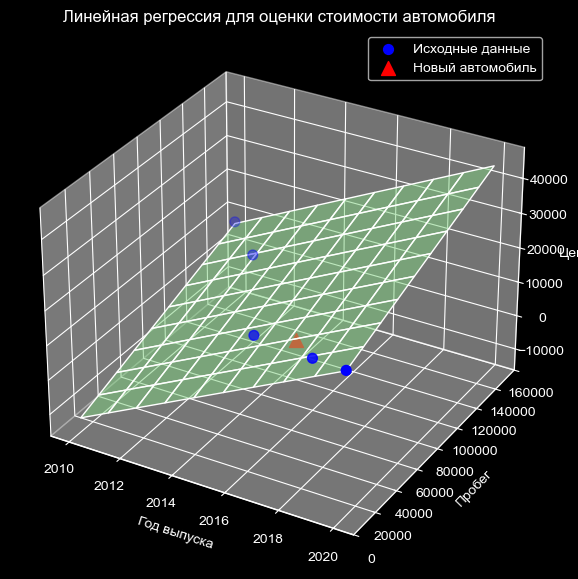

In [23]:
# Визуализация данных и модели
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# Исходные данные
ax.scatter(df["Год_выпуска"], df["Пробег"], df["Цена"], color='blue', label='Исходные данные',s=50)
# Линия регрессии
год_range = np.linspace(df["Год_выпуска"].min(), df["Год_выпуска"].max(), 10)
пробег_range = np.linspace(df["Пробег"].min(), df["Пробег"].max(), 10)
год_grid, пробег_grid = np.meshgrid(год_range, пробег_range)
цена_grid = model.predict(np.c_[год_grid.ravel(), пробег_grid.ravel()]).reshape(год_grid.shape)
ax.plot_surface(год_grid, пробег_grid, цена_grid, color='lightgreen', alpha=0.5)
# Предсказание нового автомобиля
ax.scatter(new_car[0][0], new_car[0][1], predict_price, color='red',
s=100, label='Новый автомобиль', marker='^')
# Настройка графика
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Пробег')
ax.set_zlabel('Цена')
ax.set_title('Линейная регрессия для оценки стоимости автомобиля')
ax.legend()
plt.show()

Разбор примера:
- Мы создаём небольшой набор данных с характеристиками автомобилей и их ценой.
- Обучаем модель линейной регрессии, используя год выпуска и пробег как признаки.
- Оцениваем модель с помощью среднеквадратичной ошибки (MSE), которая измеряет,
насколько точно модель предсказала цены.
- Затем делаем предсказание для нового автомобиля с заданным годом выпуска и
пробегом.

Пример 2. Предположим, что у нас есть набор данных о ценах на дома в зависимости от их
площади. Каждый дом в данных представлен как точка с двумя аттрибутами: площадь
(например, в квадратных метрах) и цена (например, в рублях). Мы хотим построить модель,
которая на основе площади будет предсказывать цену.

Для этого линейная регрессия находит оптимальную прямую, которая
минимизирует ошибку между реальными ценами домов и теми, которые мы бы получили,
если бы использовали эту прямую. Процесс нахождения этой прямой заключается в
решении уравнения: y = a * x + b
Здесь:
- y — это предсказанная цена дома,
- x — это площадь дома,
- a — коэффициент наклона прямой, который показывает, насколько цена изменяется при
изменении площади на единицу,
- b — свободный член (или точка пересечения прямой с осью Y), который определяет цену,
если площадь дома равна нулю.

Алгоритм обучения линейной регрессии работает так, чтобы найти такие значения
для a и b , при которых ошибка (разница между предсказанными и реальными значениями)
будет минимальной.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [25]:
# Данные о площади (X) и цене (y)
X = np.array([30, 50, 70, 100]).reshape(-1, 1) # Площадь (м²)
y = np.array([3000000, 5000000, 7000000, 10000000]) # Цена (₽)

In [26]:
# Создаем модель линейной регрессии
model = LinearRegression()
# Обучаем модель на данных
model.fit(X, y)

LinearRegression()

In [27]:
# Коэффициенты модели
a = model.coef_[0] # Коэффициент наклона
b = model.intercept_ # Свободный член
# Печатаем результаты
print(f"Уравнение линейной регрессии: y = {a:.2f} * x + {b:.2f}")

Уравнение линейной регрессии: y = 100000.00 * x + 0.00


In [28]:
# Делаем предсказания
X_new = np.array([80]).reshape(-1, 1) # Площадь нового дома
y_pred = model.predict(X_new) # Предсказанная цена
print(f"Предсказанная цена для дома с площадью 80 м²: {y_pred[0]:,.2f} ₽")

Предсказанная цена для дома с площадью 80 м²: 8,000,000.00 ₽


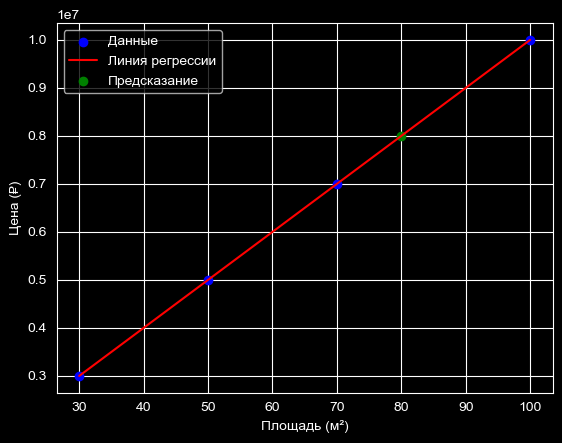

In [29]:
# Визуализация данных и линии регрессии
plt.scatter(X, y, color='blue', label='Данные')
plt.plot(X, model.predict(X), color='red', label='Линия регрессии')
plt.scatter(X_new, y_pred, color='green', label='Предсказание')
plt.xlabel('Площадь (м²)')
plt.ylabel('Цена (₽)')
plt.legend()
plt.show()

Объяснение:
1. Импорт библиотек: Мы используем `numpy` для работы с массивами, `matplotlib.pyplot`
для построения графиков и `LinearRegression` из `sklearn` для самой регрессии.
2. Данные: Мы задаем массивы `X` (площадь домов) и `y` (цены).
3. Создание модели: Мы создаем модель линейной регрессии и обучаем её с помощью
метода `fit`.
4. Получение коэффициентов: После обучения модели мы получаем коэффициент наклона
`a` и свободный член `b`.
5. Предсказание: Мы делаем предсказание для нового значения площади (80 м²) с
помощью метода `predict`.
6. Визуализация: Строим график с исходными данными, линией регрессии и
предсказанием для нового дома.

Результаты: Код выведет уравнение линейной регрессии и предсказанную цену для
дома с площадью 80 м², а также покажет график с данными, линией регрессии и точкой
предсказания.

Этот код легко можно адаптировать для других данных или для решения более
сложных задач!

Таким образом, линейная регрессия позволяет нам делать предсказания и
анализировать зависимости между признаками и целевой переменной.